# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


1. Build a decision tree model for the TLC dataset that predicts whether or not a customer will leave a tip.
2. The model may predict certain demographics may tip more and prioritize those groups over others. If the model predicts a customer will give a tip when they won't, it will falsely incentivize taxicab drivers to pursue these customers and lose profit.
3. A model that can be built with a higher accuracy than a random classifier can find customers who pay higher fares more reliably.
4. I would proceed with the request to build this model as random forest is powerful technique that does not need to normalize features and takes many approaches to find an average score from its learners.
5. The objective could section tips into ranges instead where a driver is alerted when a customer will leave a large tip.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


1. Generous tips rely on features like trip distance, trip duration, and payment type.
2. The target variable would be the tip amount
3. The goal is to find whether a tip crosses a threshold and is true, so recall is the best metric in maximizing the number of higher tips that are actually true. An analysis of the data is needed to determine the metric.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier, plot_importance

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,23.00,3.52,16.650819
1,24.44,3.11,16.016154
2,7.26,0.88,7.163868
3,30.00,3.70,18.545560
4,15.00,4.44,16.132864


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
# Merge datasets
df = pd.concat([df0, nyc_preds_means], axis=1)

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [8]:
# Subset the data to isolate only customers who paid by credit card
df1 = df.copy()
df1 = df1[df1.payment_type == 1] # 1 for credit card

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
 

$$\text{tip percent} = \frac{\text{tip amount}}{\text{total amount} - \text{tip amount}}$$


Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous. 

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system. 

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [9]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case. 

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  

In [10]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

In [11]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,23.00,3.52,16.650819,0.200
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.44,3.11,16.016154,0.238
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.26,0.88,7.163868,0.199
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.00,3.70,18.545560,0.300
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.90,2.05,10.600430,0.200


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [12]:
# Create 'generous' col (target)
def tip_convert(row):
    """
    Converts a tip percentage to 0 (<0.20) or 1 (>0.20)
        Parameters:
            row (float): tip percentage for taxicab ride
        Returns:
            row (int): 1 or 0 depending on percentage
    """
    return 0 if row < 0.20 else 1

df1['generous'] = df1['tip_percent']
df1['generous'] = df1['generous'].apply(tip_convert)

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [13]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [14]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [15]:
import datetime as dt

# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].copy().apply(lambda x: 1 if (x.time() >= dt.time(6)) and (x.time() < dt.time(10)) else 0)

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].copy().apply(lambda x: 1 if (x.time() >= dt.time(10)) and (x.time() < dt.time(16)) else 0)

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].copy().apply(lambda x: 1 if (x.time() >= dt.time(16)) and (x.time() < dt.time(20)) else 0)

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].copy().apply(lambda x: 1 if (x.time() >= dt.time(20)) or (x.time() < dt.time(6)) else 0)


You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [16]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examine the first five rows of your dataframe.

In [17]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,23.00,3.52,16.650819,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.44,3.11,16.016154,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.26,0.88,7.163868,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.00,3.70,18.545560,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.90,2.05,10.600430,0.200,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [18]:
# Drop columns
cols_to_drop = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 
                 'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 
                 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent']

df_subset = df1.drop(cols_to_drop, axis=1).copy()

#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [19]:
# 1. Define list of cols to convert to string
cols_to_str = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID']

# 2. Convert each column to string
df_subset[cols_to_str] = df_subset[cols_to_str].astype(str)

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [20]:
df_subset.head()

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,100,231,23.00,3.52,16.650819,1,saturday,1,0,0,0,mar
1,1,1,1,186,43,24.44,3.11,16.016154,1,tuesday,0,1,0,0,apr
2,1,1,1,262,236,7.26,0.88,7.163868,0,friday,1,0,0,0,dec
3,2,1,1,188,97,30.00,3.70,18.545560,1,sunday,0,1,0,0,may
5,2,6,1,161,236,11.90,2.05,10.600430,1,saturday,0,0,0,1,mar


In [21]:
# Convert categoricals to binary
df2 = pd.get_dummies(df_subset,
                     drop_first=True,
                     dtype=int)

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [22]:
# Get class balance of 'generous' col
df2['generous'].value_counts(normalize=True)

generous
1    0.526564
0    0.473436
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

F1 score is the average of the precision and recall scores.

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [23]:
# Isolate the features (X)
X = df2.copy()
# Isolate target variable (y)
y = X.pop('generous')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, stratify=y, random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [24]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {
    'max_depth':[7],
    'max_features': [75],
    'max_samples': [0.8],
    'min_samples_leaf': [6],
    'n_estimators':[5, 10, 15]
}

# 3. Define a list of scoring metrics to capture
scoring = ('f1', 'precision', 'recall', 'accuracy')

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [25]:
%%time

rf1.fit(X_train, y_train)

CPU times: total: 2.58 s
Wall time: 2.58 s


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [7], 'max_features': [75], 'max_samples': [0.8], 'min_samples_leaf': [6], ...}"
,scoring,"('f1', ...)"
,n_jobs,None
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,15


<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [26]:
import pickle 

# Define a path to the folder where you want to save the model
dir = 'output'

In [27]:
import os
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(os.path.join(path, save_name, '.pickle'), 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [28]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(os.path.join(path, saved_model_name, '.pickle'), 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds. 

In [29]:
# Examine best score
rf1.best_score_

np.float64(0.7472308620296806)

Examine the best combination of hyperparameters.

In [30]:
rf1.best_estimator_

,n_estimators,15
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,75
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [31]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [64]:
rf_train_scores = make_results("RF_Train", rf1, "f1")
rf_train_scores

,model,precision,recall,F1,accuracy
0,RF_Train,0.695044,0.807932,0.747231,0.712168


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

In [33]:
rf_preds = rf1.predict(X_test)

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

Using several models gives different approaches to find the best scores. The drawback is that using more models is computational intensive for multiple training sessions.

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [34]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [65]:
# Get scores on test data
rf_test_scores = get_test_scores("RF_Test", rf_preds, y_test)

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [ ]:
 # Get scores on test data
rf_test_scores

,model,precision,recall,F1,accuracy
0,RF_Test,0.683272,0.810323,0.741394,0.70226


**Question:** How do your test results compare to your validation results?

The model performs slightly worst on the test data than the training data, but not by a substantial amount.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [37]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_param = {
    'max_depth': [9],
    'min_child_weight': [2],
    'learning_rate': [0.15],
    'n_estimators': [70],
    'subsample': [0.6],
    'colsample_bytree': [0.6]
}

# 3. Define a list of scoring metrics to capture
scoring = ('accuracy', 'precision', 'recall', 'f1')

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_param, scoring=scoring, cv=5, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [38]:
%%time

xgb_cv.fit(X_train, y_train)


CPU times: total: 36.2 s
Wall time: 2.78 s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6], 'learning_rate': [0.15], 'max_depth': [9], 'min_child_weight': [2], ...}"
,scoring,"('accuracy', ...)"
,n_jobs,None
,refit,'f1'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


Get the best score from this model.

In [39]:
# Examine best score
xgb_cv.best_score_

np.float64(0.7302876307475958)

And the best parameters.

In [40]:
# Examine best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.15,
 'max_depth': 9,
 'min_child_weight': 2,
 'n_estimators': 70,
 'subsample': 0.6}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [67]:
# Call 'make_results()' on the GridSearch object
xgb_train_scores = make_results("XGB_Train", xgb_cv, "f1")
xgb_train_scores

,model,precision,recall,F1,accuracy
0,XGB_Train,0.69225,0.772784,0.730288,0.699475


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [42]:
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [43]:
# Get scores on test data
xgb_test_scores = get_test_scores("XGBClassifier", xgb_preds, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGBClassifier,0.674569,0.778607,0.722864,0.685555


In [74]:
results = pd.concat([rf_train_scores, rf_test_scores, xgb_train_scores, xgb_test_scores], ignore_index=True)
results

,model,precision,recall,F1,accuracy
0,RF_Train,0.695044,0.807932,0.747231,0.712168
1,RF_Test,0.683272,0.810323,0.741394,0.702260
2,XGB_Train,0.692250,0.772784,0.730288,0.699475
3,XGBClassifier,0.674569,0.778607,0.722864,0.685555


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

The random forest model performs better on the test data than the xgboost model. Random forest is a better predictor when trying to extrapolate data.

Plot a confusion matrix of the model's predictions on the test data.

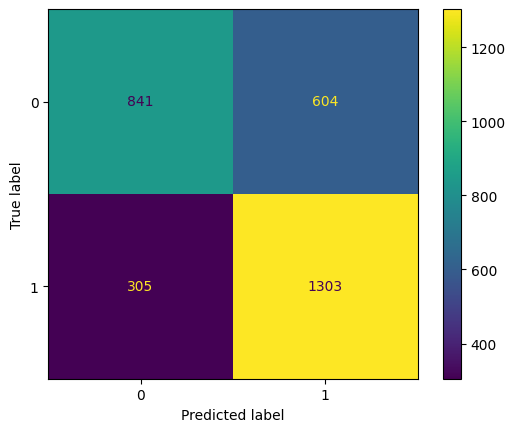

In [44]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=rf1.classes_)

# Plot confusion matrix
cm_plot.plot();

**Question:** What type of errors are more common for your model?

In [45]:
y_test.value_counts()

generous
1    1608
0    1445
Name: count, dtype: int64

Of the 1608 customers that tips generously, the model captured 1303 of them. The largest error the model makes is a Type I error, where it falsely predicts that 604 customers will leave a generous tip.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

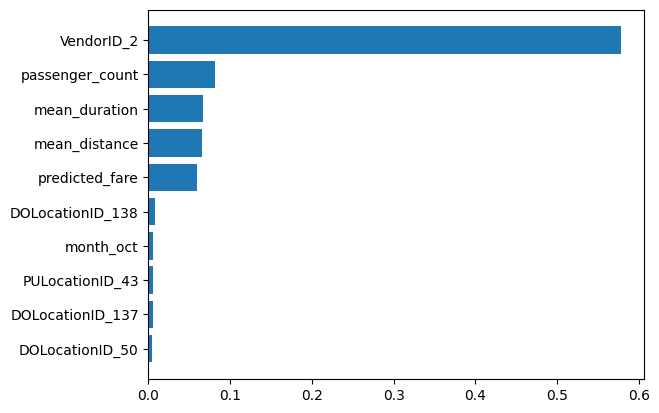

In [46]:
feature_importances = rf1.best_estimator_.feature_importances_

feature_importances = pd.Series(feature_importances, index=X_test.columns).sort_values(ascending=False)
feature_importances.head()

plt.barh(width=feature_importances[:10], y=feature_importances.index[:10])
plt.gca().invert_yaxis()
plt.show()


## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?** 

The model performs better than a random classifier, and the performance is stable across the test set. The random forest classifier model should be used.

2. **What was your model doing? Can you explain how it was making predictions?**   

The model was splitting on class weights for the model features until a certain weight was reached for a leaf node to appear for each learner. The features that had the most effect on the model contributed to the largest reductions of impurity for the model. 

3. **Are there new features that you can engineer that might improve model performance?**   

The trip distance, total amount, and trip duration can be segmented into categories that define long trips vs short trips, expensive trips vs cheap trips, fast trips vs slow trips. 

4. **What features would you want to have that would likely improve the performance of your model?**

To calculate tips, ratings on driver performance would be useful to access the personal experience that contributes to customers leaving larger tips.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.